In [1]:
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
from scipy import special
import math

#libraries for reading csv
import csv
import pandas as pd

In [2]:


def plotting(xlabel, ylabel, title = None, grid = True, legend = False, yscale = None, axfsize = 14, legendfsize = 14):
    plt.xlabel(xlabel, fontsize = axfsize)
    plt.ylabel(ylabel, fontsize = axfsize)
    plt.title(title)
    if yscale: plt.yscale(yscale)
    if grid: plt.grid(alpha =0.2)  
    if legend: plt.legend(fontsize = legendfsize)     


In [3]:
#equation 1.1 of Lewin and Smith
MD = 10 #geV
MT = 71 #geV approx for germanium

r = 4*(MD*MT)/(MD+MT)**2
print(r)

E0 = 4.4 #keV--a total guess
R0 = 1.7*E0*r #to get the rate at Er=0 correct.

0.4328608443834781


In [4]:
def dRdE(Er):
    return (R0/(E0*r))*np.exp(-(Er/(E0*r)))

In [5]:
#set up lindhard
#Voltage: 75V
#remember: Ep = Er + V*(Y(Er)*Er/epsilon)
V=75
eps=3.0

#need a function that will get an Er given an Ep for nuclear recoils this one is for constant yield. 
def ErNR(Ep):
    return Ep/(1+(V*0.3/eps))

#now can use this transformation (plus a Jacobian) to get the new distribution
#jacobian is dEr/dEp = 1/(V*0.3/eps)
def dRdENR(Ep):
    return dRdE(ErNR(Ep))*(1/(1+(V*0.3/eps)))

[0.19950645 0.19703722 0.19459856 0.19219007 0.1898114  0.18746217
 0.18514201 0.18285057 0.18058748 0.17835241 0.176145   0.17396491
 0.17181181 0.16968535 0.16758521 0.16551106 0.16346258 0.16143946
 0.15944138 0.15746802 0.15551909 0.15359429 0.1516933  0.14981584
 0.14796162 0.14613035 0.14432174 0.14253552 0.1407714  0.13902912
 0.1373084  0.13560898 0.13393059 0.13227298 0.13063588 0.12901904
 0.12742221 0.12584515 0.12428761 0.12274934 0.12123011 0.11972969
 0.11824783 0.11678432 0.11533891 0.1139114  0.11250156 0.11110916
 0.109734   0.10837586 0.10703453 0.1057098  0.10440146 0.10310932
 0.10183317 0.10057281 0.09932805 0.0980987  0.09688457 0.09568546
 0.09450119 0.09333158 0.09217645 0.09103561 0.08990889 0.08879612
 0.08769712 0.08661172 0.08553975 0.08448106 0.08343546 0.08240281
 0.08138294 0.08037569 0.0793809  0.07839843 0.07742812 0.07646982
 0.07552337 0.07458865 0.07366549 0.07275375 0.0718533  0.070964
 0.0700857  0.06921827 0.06836158 0.06751549 0.06667988 0.065854

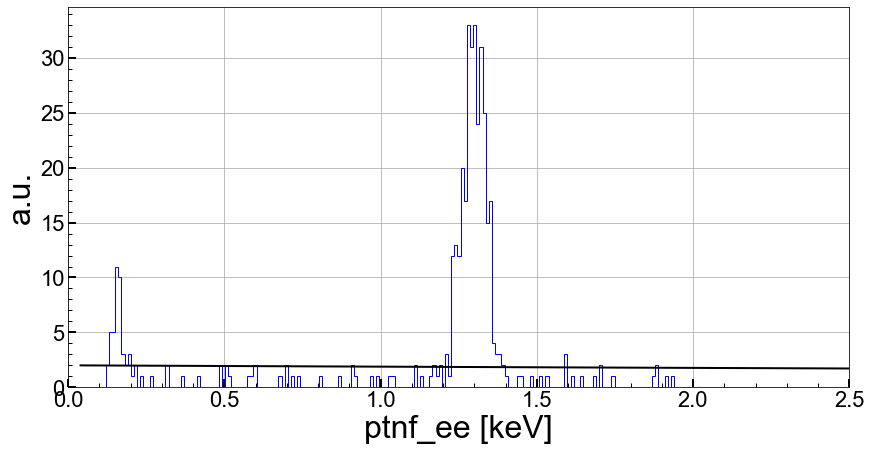

In [6]:
datarelease = np.append(np.loadtxt('data/event_EnergykeVee_Per1.txt'),np.loadtxt('data/event_EnergykeVee_Per2.txt'), axis = 0)

plt.figure(figsize= (14,7))
Ervec = np.linspace(0.04,20,100)
print(dRdENR(Ervec))
plt.plot(Ervec,10*dRdENR(Ervec),color='k',label="Lewin Eq. 1.1")
plt.xlim([0,2.5])
plt.hist(datarelease, histtype = 'step', color = 'blue', bins = np.linspace(0, 2 , 200))
plt.xlabel('ptnf_ee [keV]'); plt.ylabel('a.u.'); plt.grid()
plt.show()

